#### Imports

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt

#### Data Extraction

In [2]:
# Data extraction
start_date = "2017-01-01"
end_date = "2022-06-01"
symbol = "SPY"
df = DataReader(name=symbol, data_source='yahoo', start=start_date, end=end_date)
df.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,225.830002,223.880005,225.039993,225.240005,91366500.0,204.625168
2017-01-04,226.750000,225.610001,225.619995,226.580002,78744400.0,205.842499
2017-01-05,226.580002,225.479996,226.270004,226.399994,78379000.0,205.679016


#### Feature Adjustments

In [4]:
# Add Moving Averages
df["MA_12"] = df["Adj Close"].rolling(window=12).mean()
df["MA_21"] = df["Adj Close"].rolling(window=21).mean()
df.loc[df["MA_12"] > df["MA_21"], "Signal"] = 1
df.loc[df["MA_12"] <= df["MA_21"], "Signal"] = 0
df["Signal"] = df["Signal"].shift(1)
df.head(3)

,High,Low,Open,Close,Volume,Adj Close,MA_12,MA_21,Signal
Date,,,,,,,,,
2017-01-03,225.830002,223.880005,225.039993,225.240005,91366500.0,204.625168,NaN,NaN,NaN
2017-01-04,226.750000,225.610001,225.619995,226.580002,78744400.0,205.842499,NaN,NaN,NaN
2017-01-05,226.580002,225.479996,226.270004,226.399994,78379000.0,205.679016,NaN,NaN,NaN


In [5]:
# Add Returns
df["lrets_bench"] = np.log(df["Adj Close"] / df["Adj Close"].shift(1))
df["lrets_prod_bench"] = df["lrets_bench"].cumsum()
df["prod_bench"] = np.exp(df["lrets_prod_bench"]) - 1
df.head(3)

,High,Low,Open,Close,Volume,Adj Close,MA_12,MA_21,Signal,lrets_bench,lrets_prod_bench,prod_bench
Date,,,,,,,,,,,,
2017-01-03,225.830002,223.880005,225.039993,225.240005,91366500.0,204.625168,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,226.750000,225.610001,225.619995,226.580002,78744400.0,205.842499,NaN,NaN,NaN,0.005931,0.005931,0.005949
2017-01-05,226.580002,225.479996,226.270004,226.399994,78379000.0,205.679016,NaN,NaN,NaN,-0.000795,0.005137,0.005150


In [7]:
# Add Strategy Returns
df["lrets_strat"] = np.log(df["Open"].shift(-1) / df["Open"]) * df["Signal"]
df["lrets_prod_strat"] = df["lrets_strat"].cumsum()
df["prod_strat"] = np.exp(df["lrets_prod_strat"]) - 1
df.tail(3)

,High,Low,Open,Close,Volume,Adj Close,MA_12,MA_21,Signal,lrets_bench,lrets_prod_bench,prod_bench,lrets_strat,lrets_prod_strat,prod_strat
Date,,,,,,,,,,,,,,,
2022-05-27,415.380005,407.700012,407.910004,415.260010,84768700.0,413.473907,396.800107,401.562985,0.0,0.024253,0.703415,1.020641,0.0,0.211001,0.234914
2022-05-31,416.459991,410.029999,413.549988,412.929993,95937000.0,411.153931,398.508560,401.607080,0.0,-0.005627,0.697788,1.009303,0.0,0.211001,0.234914
2022-06-01,416.239990,406.929993,415.170013,409.589996,86585800.0,407.828308,399.161573,401.375225,0.0,-0.008121,0.689666,0.993051,NaN,NaN,NaN


In [8]:
# Remove NaN's
df.dropna(inplace=True)

In [11]:
# Review DataFrame
print("DF Length: ", len(df))
df.head()

DF Length:  1341


,High,Low,Open,Close,Volume,Adj Close,MA_12,MA_21,Signal,lrets_bench,lrets_prod_bench,prod_bench,lrets_strat,lrets_prod_strat,prod_strat
Date,,,,,,,,,,,,,,,
2017-02-02,228.100006,226.820007,227.619995,227.770004,69657600.0,206.923599,206.791134,206.420064,1.0,0.000659,0.011170,0.011232,0.005258,0.005258,0.005272
2017-02-03,229.550003,228.460007,228.820007,229.339996,80563200.0,208.349915,206.987213,206.539464,1.0,0.006869,0.018039,0.018203,0.000218,0.005477,0.005492
2017-02-06,229.330002,228.539993,228.869995,228.929993,57790100.0,207.977432,207.215846,206.648913,1.0,-0.001789,0.016250,0.016382,0.002226,0.007702,0.007732
2017-02-07,229.660004,228.720001,229.380005,228.940002,57931200.0,207.986526,207.382397,206.723753,1.0,0.000044,0.016293,0.016427,-0.001920,0.005782,0.005799
2017-02-08,229.389999,228.309998,228.940002,229.240005,51566200.0,208.259048,207.616327,206.844017,1.0,0.001309,0.017603,0.017759,0.001310,0.007092,0.007117


#### Plot Results

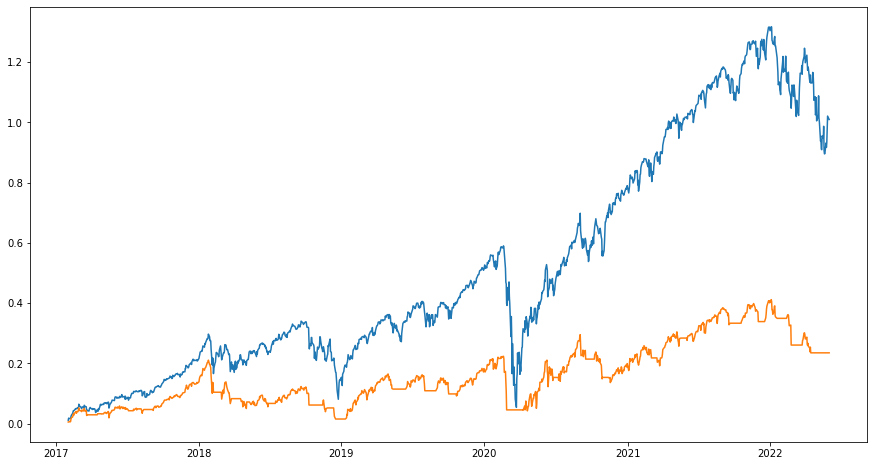

In [12]:
# Show Graph
fig = plt.figure(figsize=(15, 8))
plt.plot(df["prod_bench"])
plt.plot(df["prod_strat"])
plt.show()

#### Metrics

In [13]:
# Calculate Returns
print("Benchmark Returns: ", df["prod_bench"].iloc[-1])
print("Strategy Returns: ", df["prod_strat"].iloc[-1])

Benchmark Returns:  1.0093028388967764
Strategy Returns:  0.23491408583051498


In [24]:
# Calculate Sharpe
def calculate_sharpe(returns):
    N = 255
    rf = 0.01
    SQRTN = np.sqrt(N)
    mean = returns.mean() * N
    sigma = returns.std() * SQRTN
    sharpe = round((mean - rf) / sigma, 3)
    return sharpe

In [25]:
# Show Sharpe
bench_sharpe = calculate_sharpe(df["lrets_bench"].values)
strat_sharpe = calculate_sharpe(df["lrets_strat"].values)
print("Benchmark Sharpe: ", bench_sharpe)
print("Strategy Sharpe: ", strat_sharpe)

Benchmark Sharpe:  0.614
Strategy Sharpe:  0.251
